Saved: measured_data/251105_power_4px_power_uW.png
Saved: measured_data/251106_power_0px_uW_power_uW.png
Saved: measured_data/251106_power_8px_power_uW.png
Saved: measured_data/GlobalNormalizedMeasurements_power_uW.png
Saved: measured_data/NormalizedMeasurements_power_uW.png
Saved: measured_data/NormLutMeasurements_power_uW.png
Saved: measured_data/PhaseFitMeasurements_power_uW.png
Saved: measured_data/PhaseMeasurements_power_uW.png
Saved: measured_data/Verify_0_251106_calibrated_SLM_power_uW.png

Processed 9 CSV files


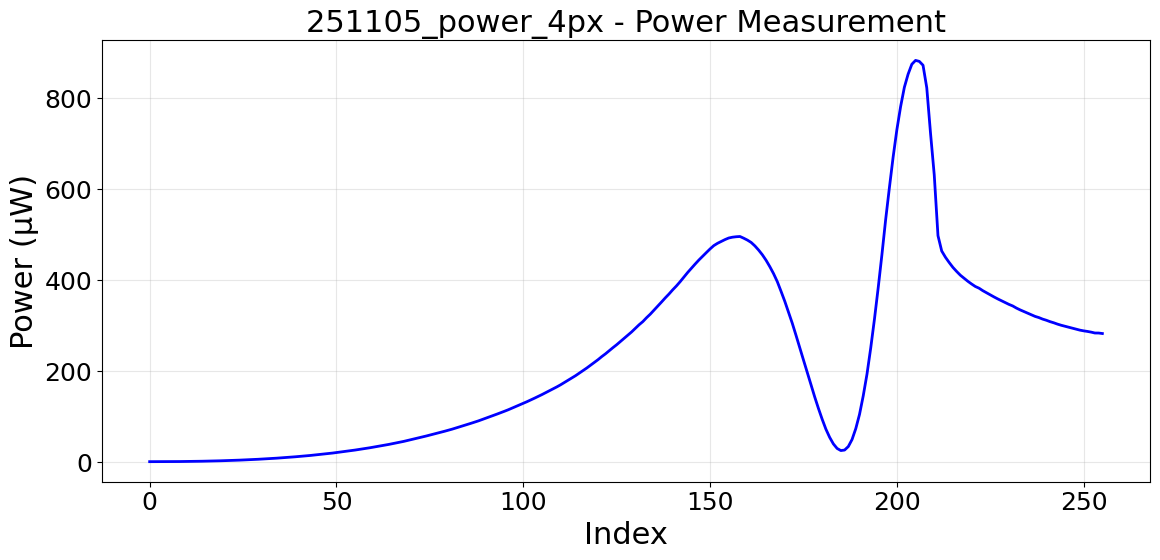

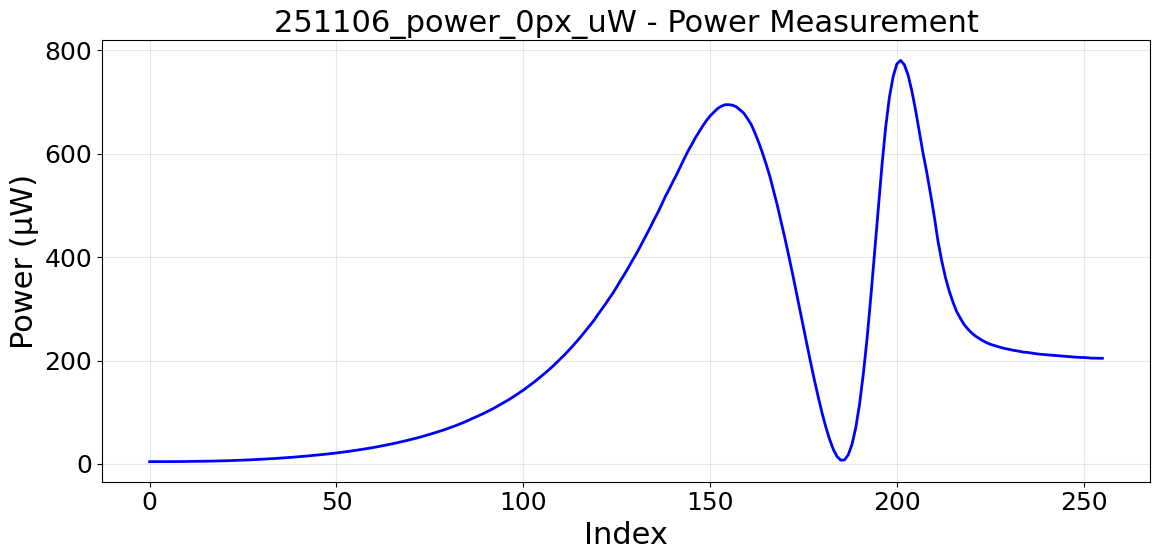

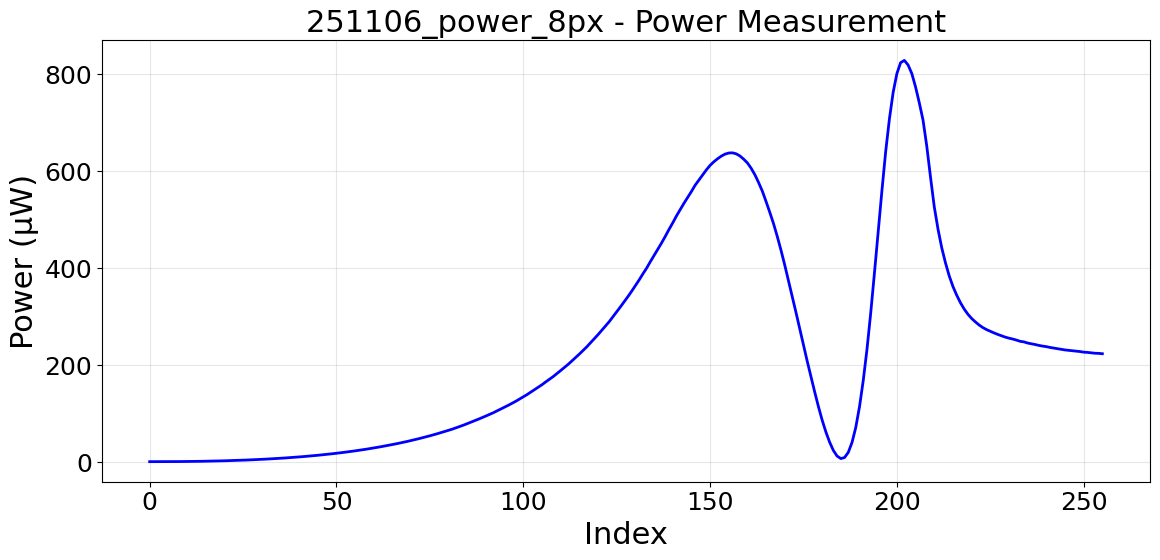

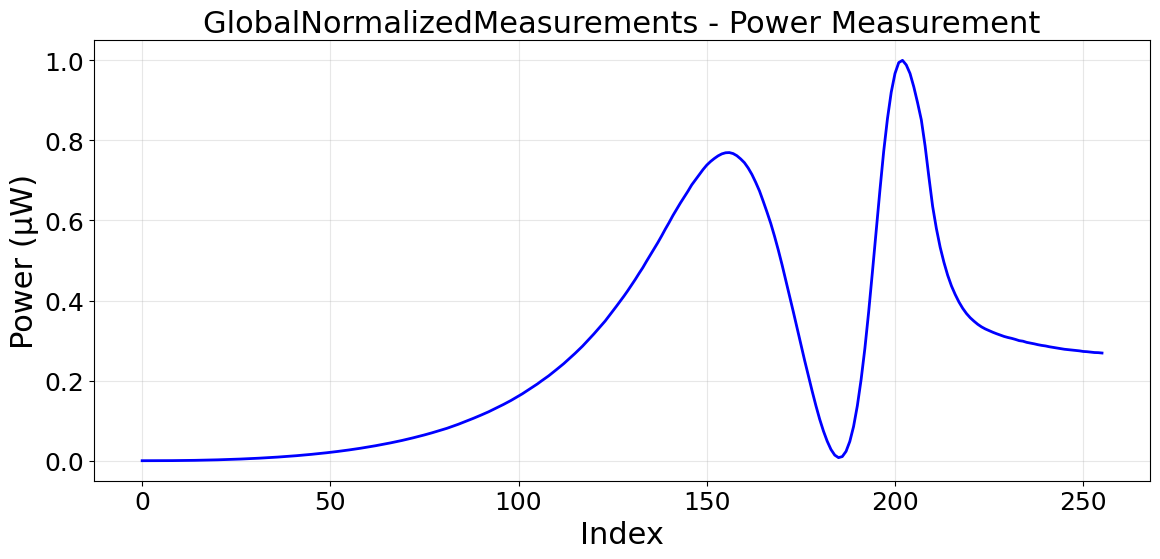

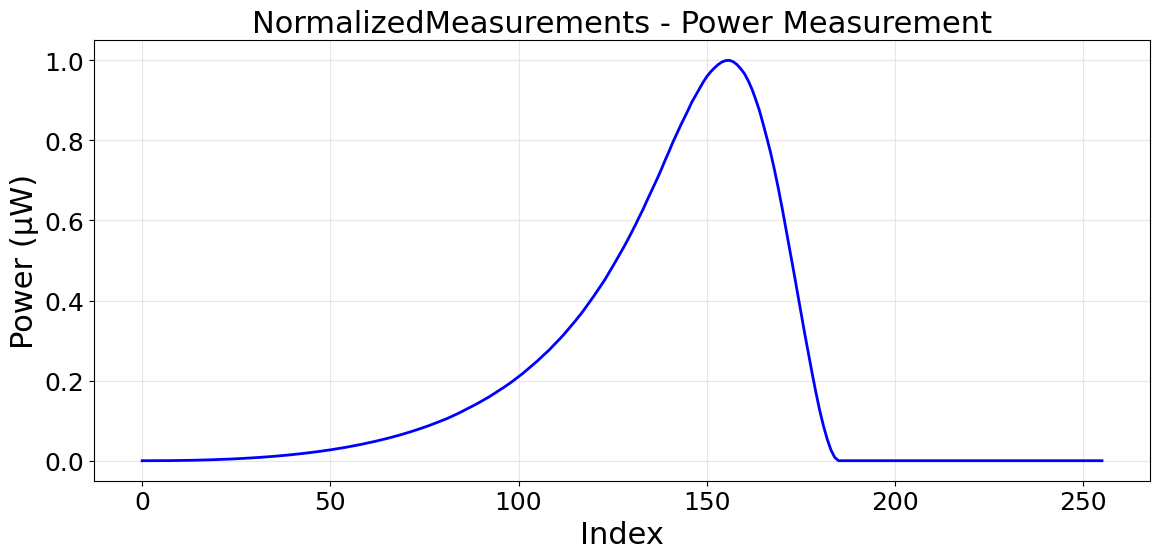

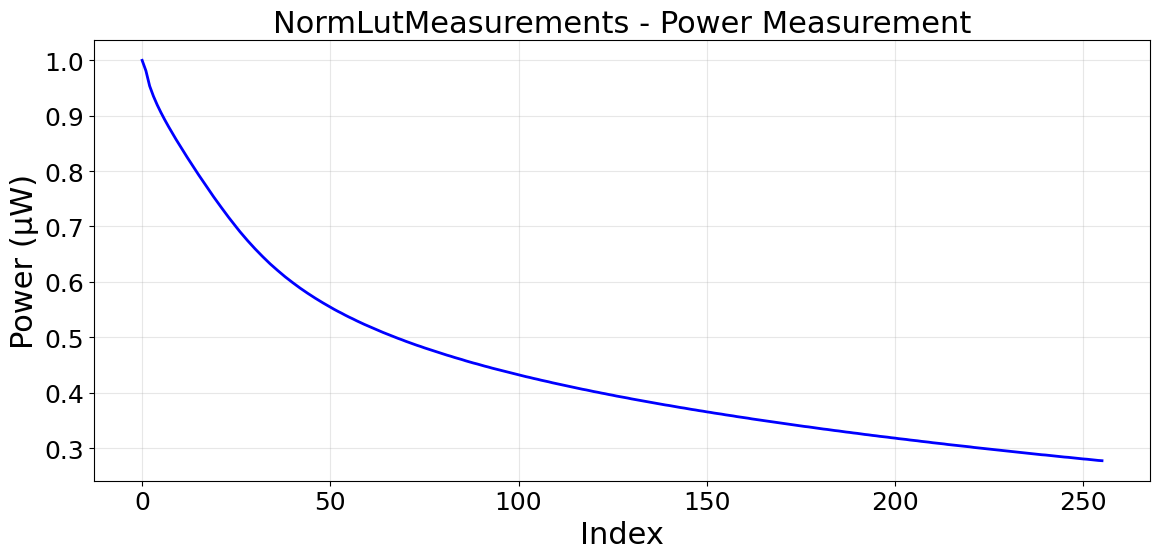

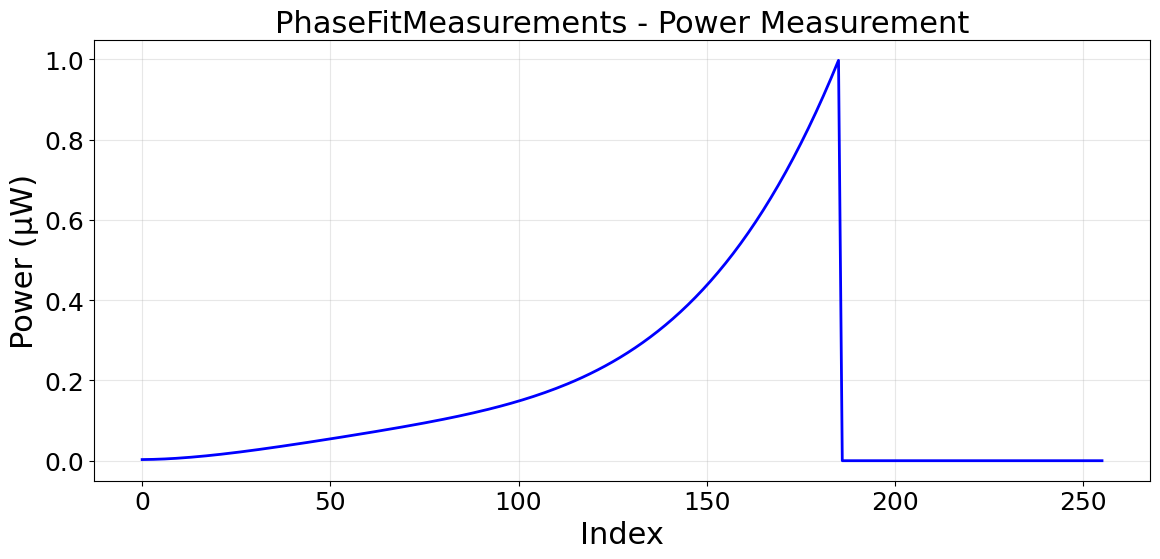

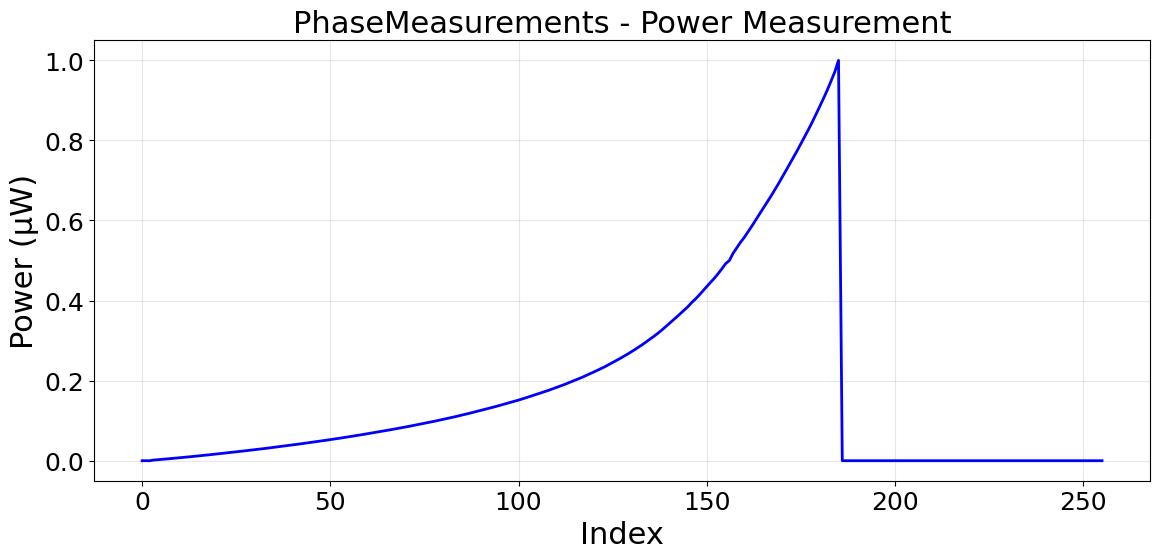

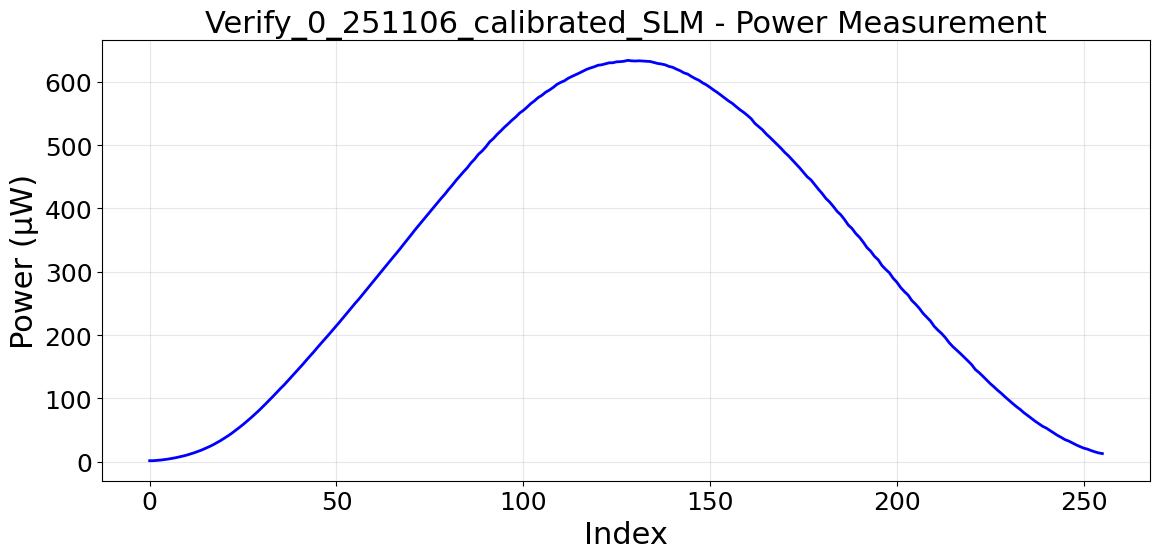

In [3]:
# plot figure of results under folder measured_data
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

font_adjust = 4
plt.rcParams.update({
        'font.size': 16+font_adjust,             # Default font size for all text
        'axes.labelsize': 18+font_adjust,         # Font size for x and y labels
        'axes.titlesize': 18+font_adjust,         # Font size for figure titles (if any)
        'xtick.labelsize': 14+font_adjust,        # Font size for x tick labels
        'ytick.labelsize': 14+font_adjust,        # Font size for y tick labels
        'legend.fontsize': 12+font_adjust,        # Font size for legend
    })

# Get all CSV files in measured_data folder
csv_files = glob.glob('measured_data/*.csv')

# Process each CSV file
for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file, header=None, names=['index', 'power_uW'])
    
    # Extract filename without extension for title
    filename = os.path.basename(csv_file)
    base_name = os.path.splitext(filename)[0]
    
    # Create figure
    plt.figure(figsize=(12, 6))
    plt.plot(df['index'], df['power_uW'], linewidth=2, color='blue')
    plt.xlabel('Index')
    plt.ylabel('Power (µW)')
    plt.title(f'{base_name} - Power Measurement')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Save figure
    output_path = f'measured_data/{base_name}_power_uW.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f'Saved: {output_path}')
    
print(f'\nProcessed {len(csv_files)} CSV files')

Saved: measured_data/Verify_0_251106_calibrated_SLM_normalized_comparison.png


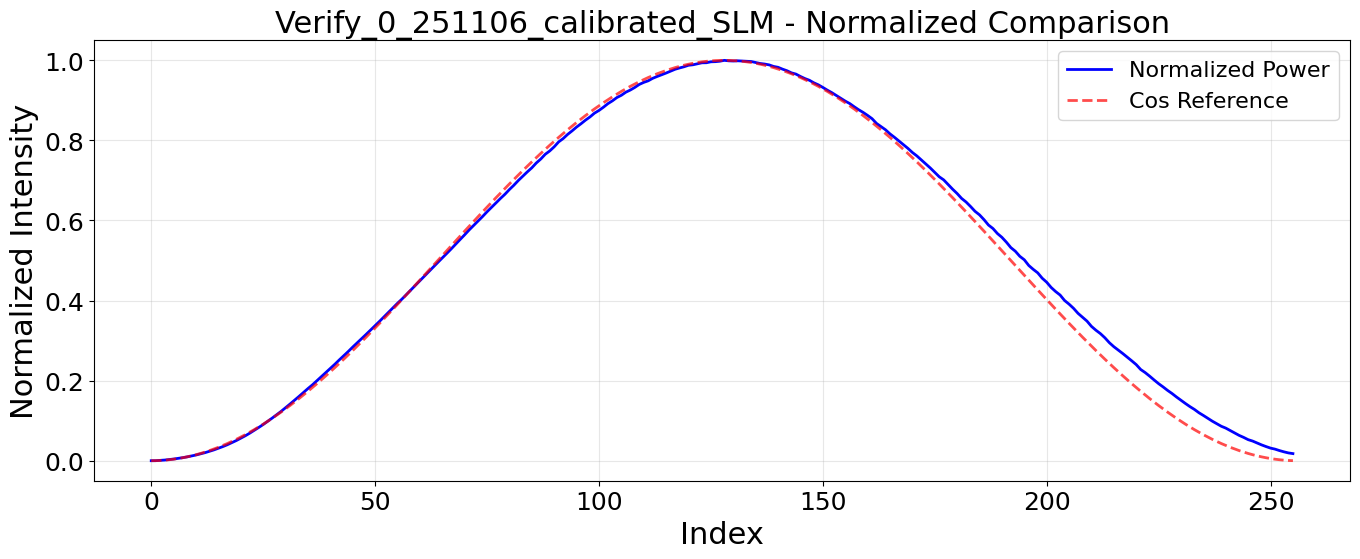

Correlation with cosine: -0.9985


In [22]:
# normalized the file and compared with a cos function
import numpy as np

File_name = "Verify_0_251106_calibrated_SLM.csv"
df = pd.read_csv(f'./measured_data/{File_name}', header=None, names=['index', 'power_uW'])

# Normalize the power data to [0, 1]
power_normalized = (df['power_uW'] - df['power_uW'].min()) / (df['power_uW'].max() - df['power_uW'].min())

# Create a cosine function for comparison
# Assuming the data represents one or more periods
x = df['index'].values
x_normalized = 2 * np.pi * x / len(x)  # Normalize x to [0, 2π]
cos_reference = (np.cos(x_normalized) - 1) / 2  # Normalize cos to [0, 1]

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(x, power_normalized, linewidth=2, label='Normalized Power', color='blue')
plt.plot(x, -cos_reference, linewidth=2, linestyle='--', label='Cos Reference', color='red', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Normalized Intensity')
plt.title(f'{os.path.splitext(File_name)[0]} - Normalized Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save figure
output_path = f'measured_data/{os.path.splitext(File_name)[0]}_normalized_comparison.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f'Saved: {output_path}')
plt.show()

# Calculate correlation
correlation = np.corrcoef(power_normalized, cos_reference)[0, 1]
print(f'Correlation with cosine: {correlation:.4f}')